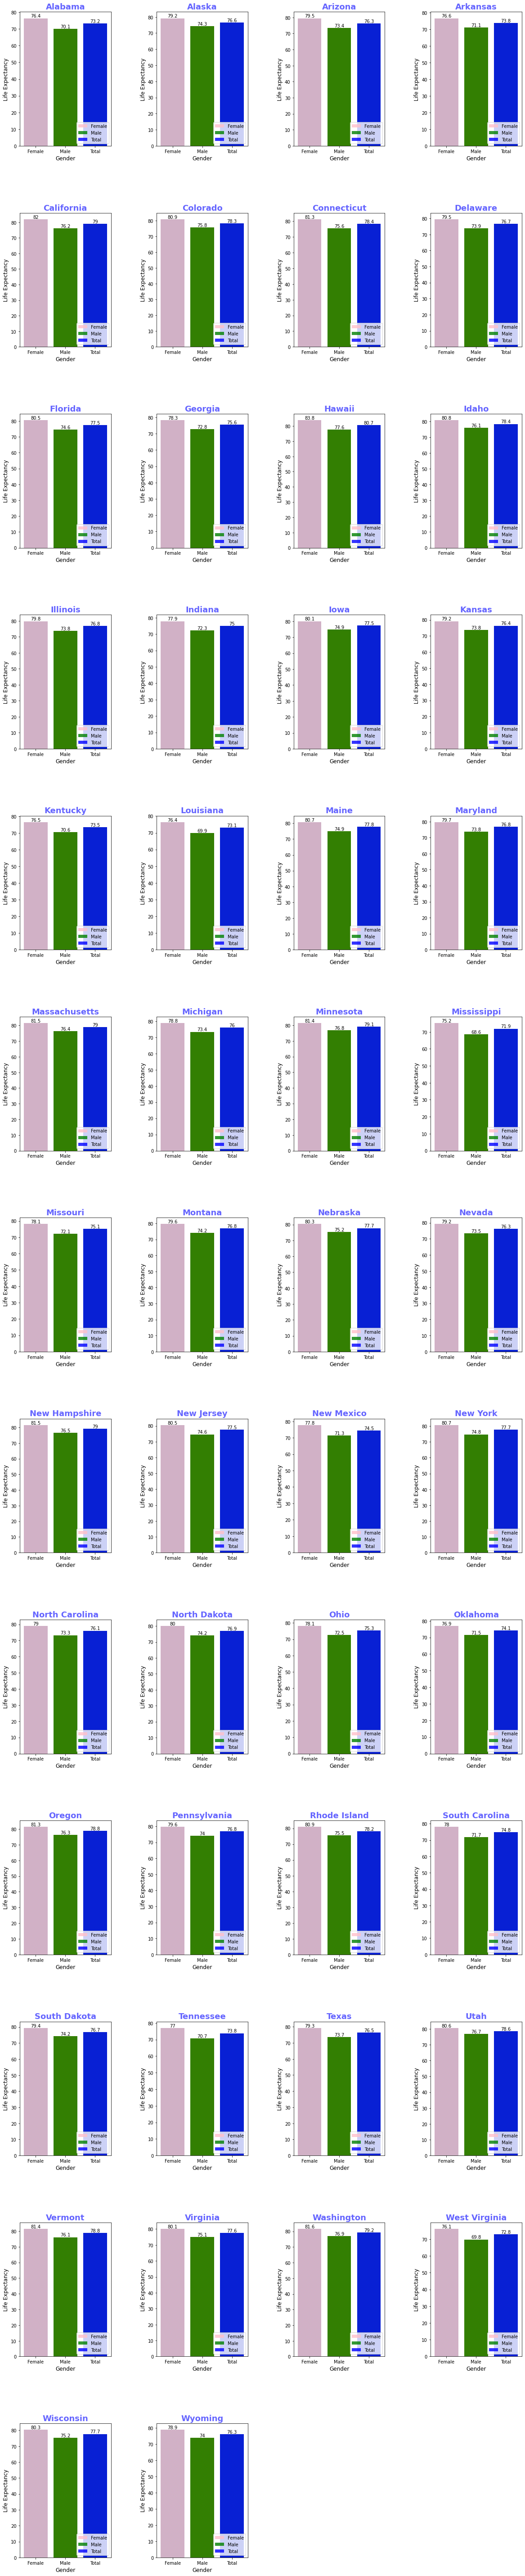

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# We make the request to the API and load the data in a Pandas DataFrame
url = "https://data.cdc.gov/resource/ss2j-8ajj.json"
data = pd.read_json(url)

new_data = data.copy()
new_data = list(new_data["state"])
doc_position = new_data.index("District of Columbia")
us_position = new_data.index("United States")

data_without_dup = np.unique(new_data)

usa_states = np.delete(np.delete(data_without_dup, us_position, axis=0), doc_position, axis=0)

#print(usa_states)
#print(len(usa_states))

state_data = [data[data["state"] == state] for state in usa_states]

# We create a figure of size 12x8 inches with 52-2=50 subplots
fig, axs = plt.subplots(13, 4, figsize=(20, 104))
fig.delaxes(axs[12][2])
fig.delaxes(axs[12][3])

# Function to graph the data of a state
def plot_state_data(state_data, ax):
    bar_width = 0.8
    opacity = 0.8
    colors = ["pink", "green", "blue"]
    
    for i, (label, group) in enumerate(state_data.groupby("sex")):
        x_pos = i * bar_width
        y_values = group["le"].values
        bar_container = ax.bar(group["sex"], y_values)
        ax.bar_label(bar_container)
        ax.bar(label, y_values, bar_width, alpha=opacity, color=colors[i], label=label)
    
    # Add the labels to the graph
    ax.set_xlabel("Gender", fontsize=12)
    ax.set_ylabel("Life Expectancy", fontsize=12)
    ax.set_title(f"{state_data.iloc[0]['state']}", fontsize=18, color= 'blue', alpha=0.6, fontweight='bold')
    ax.legend(loc="lower right")

# We plot the data of each state in its respective subplot
for i in range(len(usa_states)):
    row = i // 4
    col = i % 4        
    plot_state_data(state_data[i], axs[row, col])

# Adjust the spaces between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()
